In [1]:
import APEX as ap
import pyccl as ccl
import numpy as np

cosmo = ccl.Cosmology(
    Omega_c=0.261,
    Omega_b=0.049,
    h=0.677,
    n_s=0.9665,
    sigma8=0.8102,
    transfer_function="bbks",
    matter_power_spectrum="halofit")


In [2]:
gdwsp = ap.GalaxyDensityTracerWorkspace(
    sacc_file="/home/nathand/Documents/AstroCode/CIB-Project/HSC-Red_Blue-Maps/hsc_blue_x_cib(857).fits",
    tracer_name_root="hsc_blue_zbin",
    max_index=2,
    cosmology=cosmo
)

cibwsp = ap.CIBIntensityTracerWorkspace(
    flux_fits_file="../CIB-Project/filtered_snu_planck.fits",
    cosmology=cosmo,
    tracer_name_root="CIBLenz__",
    single_index=3
)

tracer_combos = [('hsc_blue_zbin0', 'hsc_blue_zbin0'),
                 ('hsc_blue_zbin1', 'hsc_blue_zbin1'),
                 ('hsc_blue_zbin2', 'hsc_blue_zbin2'),
                 #('hsc_blue_zbin3', 'hsc_blue_zbin3'),

                 ('hsc_blue_zbin0', 'CIBLenz__3'),
               
                 ('hsc_blue_zbin1', 'CIBLenz__3'),
                 
                 ('hsc_blue_zbin2', 'CIBLenz__3'),
              
                 #('hsc_blue_zbin3', 'CIBLenz__3')
                 ]

s = ap.SaccWorkspace('/home/nathand/Documents/AstroCode/CIB-Project/HSC-Red_Blue-Maps/hsc_blue_x_cib(857).fits', tracer_combinations=tracer_combos)

s.define_alias('cib_857GHz', 'CIBLenz__3')



{'CIBLenz__3': 'cib_857GHz'}


Getting C_ell for tracer combination hsc_blue_zbin3 and hsc_blue_zbin3
Data: [[array([  21.5,   61.5,  101.5,  141.5,  181.5,  221.5,  261.5,  301.5,
        341.5,  381.5,  421.5,  461.5,  501.5,  541.5,  581.5,  621.5,
        661.5,  701.5,  741.5,  781.5,  821.5,  861.5,  901.5,  941.5,
        981.5, 1021.5, 1061.5, 1101.5, 1141.5, 1181.5, 1221.5, 1261.5,
       1301.5, 1341.5, 1381.5, 1421.5, 1461.5, 1501.5, 1541.5, 1581.5,
       1621.5, 1661.5, 1701.5, 1741.5, 1781.5, 1821.5, 1861.5, 1901.5,
       1941.5, 1981.5, 2021.5, 2061.5, 2101.5, 2141.5, 2181.5, 2221.5,
       2261.5, 2301.5, 2341.5, 2381.5, 2421.5, 2461.5, 2501.5, 2541.5,
       2581.5, 2621.5, 2661.5, 2701.5, 2741.5, 2781.5, 2821.5, 2861.5,
       2901.5, 2941.5, 2981.5, 3021.5])], [array([3.14687257e-05, 3.29900198e-06, 3.83613853e-06, 1.75052470e-06,
       1.45044209e-06, 1.18050347e-06, 8.57150983e-07, 7.70439839e-07,
       5.67277772e-07, 4.98894453e-07, 4.64783570e-07, 4.39863677e-07,
       3.43842421e-07, 2.9

ValueError: too many values to unpack (expected 1)

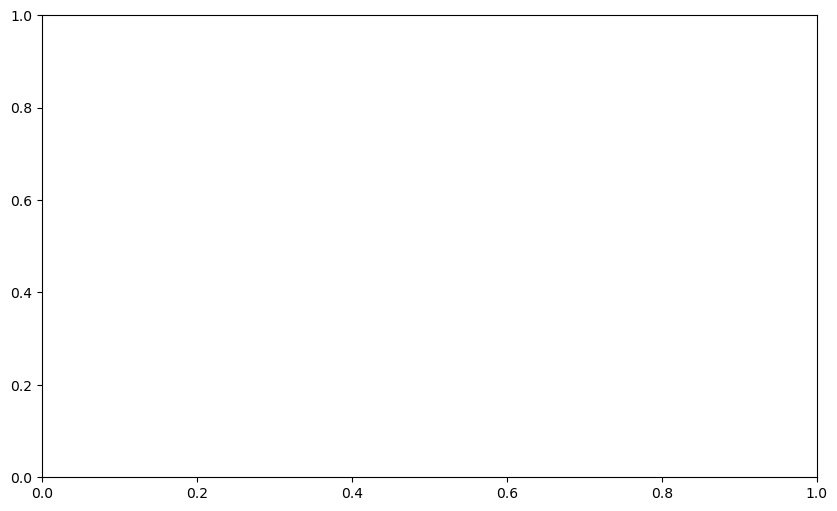

In [12]:
import matplotlib.pyplot as plt

data = s.get_c_ells(tracer_combinations=[('hsc_blue_zbin3', 'hsc_blue_zbin3')])

err = s.get_errors(tracer_combos=[('hsc_blue_zbin3', 'hsc_blue_zbin3')])

print("Data:", data)
print("Errors:", err)

plt.figure(figsize=(10, 6))
plt.errorbar(data[0], data[1], yerr=err[0], fmt='o', label='Measured Data')


In [4]:
mmodel = ap.MaleubreModel(
    Tracer1Workspace=gdwsp,
    Tracer2Workspace=cibwsp,
    tracer_combos=tracer_combos,
    sacc_workspace=s,
    cosmology=cosmo,
    logged_N=True,
    min_ell=100,
    max_ell=1000
)

In [5]:
mcmc = ap.MCMCWorkspace(
    sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/HSC-Red_Blue-Maps/hsc_blue_x_cib(857).fits',
    model=mmodel,
    likelihood_function='log_likelihood_function',

)

params = ['b_g0', 'b_g1', 'b_g2', 'b_g3',
          'N_gg0', 'N_gg1', 'N_gg2', 'N_gg3',
          'A_gg0', 'A_gg1', 'A_gg2', 'A_gg3',
          'N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3',
          'A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3',
          'bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']

mcmc.set_param_priors(
    params=params,
    priors=[
        (0.75, 5), (0.75, 5), (0.75, 5), (0.75, 5), 
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (-3, 3), (-3, 3), (-3, 3), (-3, 3),
    ]
)

mcmc.set_param_references(
    params=params,
    references=[
        1.1, 1.1, 1.1, 1.1, 
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        0.5, 0.5, 0.5, 0.5,
    ]
)

mcmc.set_param_proposals(
    params=params,
    proposals=[
        0.1, 0.1, 0.1, 0.1, 
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        0.1, 0.1, 0.1, 0.1,
    ]
)

mcmc.set_grouped_params({
    'b_gs': ['b_g0', 'b_g1', 'b_g2', 'b_g3'],
    'N_ggs': ['N_gg0', 'N_gg1', 'N_gg2', 'N_gg3'],
    'A_ggs': ['A_gg0', 'A_gg1', 'A_gg2', 'A_gg3'],
    'N_gnus': ['N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3'],
    'A_gnus': ['A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3'],    
    'bpsfrs': ['bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
})

mcmc.MCMC_config(params)

mcmc.minimize_run()



[<bound method maleubremodel.log_likelihood_function of <apex.maleubremodel object at 0x7f2668b24440>>] Initialized external likelihood.
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'b_g1': np.float64(1.1), 'b_g2': np.float64(1.1), 'b_g3': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'N_gg1': np.float64(-8.769551078621726), 'N_gg2': np.float64(-8.769551078621726), 'N_gg3': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'A_gg1': np.float64(7.0), 'A_gg2': np.float64(7.0), 'A_gg3': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'N_gnu1': np.float64(-8.769551078621726), 'N_gnu2': np.float64(-8.769551078621726), 'N_gnu3': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'A_gnu1': np.float64(7.0), 'A_gnu2': np.float64(7.0), 'A_gnu3': np.float64(7.0), 'bpsfr0': np.float64(0.5), 'bpsfr1': np.float64(0.5), 'bpsfr2': np.float64(0.5), 'bpsfr3': np.float64(0.5)}
[minimize] Run 2/2

KeyboardInterrupt: 

In [ ]:
modelled = mmodel.get_modelled_data(
    b_gs=np.array([1.948182, 2.035968, 2.298273, 2.456469]),
    N_ggs=np.array([-11.191655, -3.983871, -14.032556, -0.363131]),
    A_ggs=np.array([36.100385, 53.170345, 60.163963, 35.638479]),
    N_gnus=np.array([-6.021444, -2.913143, -10.627134, -14.951336]),
    A_gnus=np.array([0.499085, 1.034978, 1.817552, 2.186426]),
    bpsfrs=np.array([0.023589, 0.048866, 0.084527, 0.128878]),
    full_ells=True
)

{'hsc_blue_zbin0': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xc6545681e99bc263  0x61e29f3c34452ed3    0       0    , 'hsc_blue_zbin1': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xbe8d0c76d0d25513  0x61e29f3c34452ed3    0       0    , 'hsc_blue_zbin2': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x65babfde46bbd220  0x61e29f3c34452ed3    0       0    , 'CIBLenz__3': <pyccl.tracers.Tracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x357ec74fed3dbade         None           0       0    }
BOO Getting C_ell for tracer hsc_blue_zbin0 and hsc_blue_zbin0
Using full ells for tracer combination hsc_blue_zbin0 and hsc_blue_zbin0
BOO Getting C_ell for tracer hsc_blue_zbin1 and hsc_blue_zbin1
Using full ells for tracer combination hsc_blue_zbin1 and hsc_blue_zbin1
BOO Getting C_ell for tracer hsc_blue_zbin2 and hsc_blue_zbin2
Using 

In [ ]:
# blue HSC map

modelled = mmodel.get_modelled_data(
    b_gs=np.array([0.968141, 1.041514, 1.211321, 0.77414]),
    N_ggs=np.array([-9.833607, -0.914401, -5.354204, -10.95943]),
    A_ggs=np.array([5.162917, 7.920014, 10.23, 8.345604]),
    N_gnus=np.array([-5.27573, -7.276283, -11.9157, -15.0]),
    A_gnus=np.array([0.542107, 2.166792, 5.607997, 0.042057]),
    bpsfrs=np.array([0.070701, 0.156573, 0.441087, 0.034104]),
    full_ells=True
)

{'hsc_blue_zbin0': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xc6545681e99bc263  0x61e29f3c34452ed3    0       0    , 'hsc_blue_zbin1': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xbe8d0c76d0d25513  0x61e29f3c34452ed3    0       0    , 'hsc_blue_zbin2': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x65babfde46bbd220  0x61e29f3c34452ed3    0       0    , 'CIBLenz__3': <pyccl.tracers.Tracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x357ec74fed3dbade         None           0       0    }
BOO Getting C_ell for tracer hsc_blue_zbin0 and hsc_blue_zbin0
Using full ells for tracer combination hsc_blue_zbin0 and hsc_blue_zbin0
BOO Getting C_ell for tracer hsc_blue_zbin1 and hsc_blue_zbin1
Using full ells for tracer combination hsc_blue_zbin1 and hsc_blue_zbin1
BOO Getting C_ell for tracer hsc_blue_zbin2 and hsc_blue_zbin2
Using 

In [ ]:

measured_data = s.get_c_ells(tracer_combos)

errors = s.get_errors(tracer_combos)

print()


Getting C_ell for tracer combination hsc_blue_zbin0 and hsc_blue_zbin0
Getting C_ell for tracer combination hsc_blue_zbin1 and hsc_blue_zbin1
Getting C_ell for tracer combination hsc_blue_zbin2 and hsc_blue_zbin2
Getting C_ell for tracer combination hsc_blue_zbin0 and cib_857GHz
Getting C_ell for tracer combination hsc_blue_zbin1 and cib_857GHz
Getting C_ell for tracer combination hsc_blue_zbin2 and cib_857GHz



2
[3.64955364e-06 1.04287440e-06 3.81788980e-08]
[4.99018718e-07 1.12845232e-07]
1


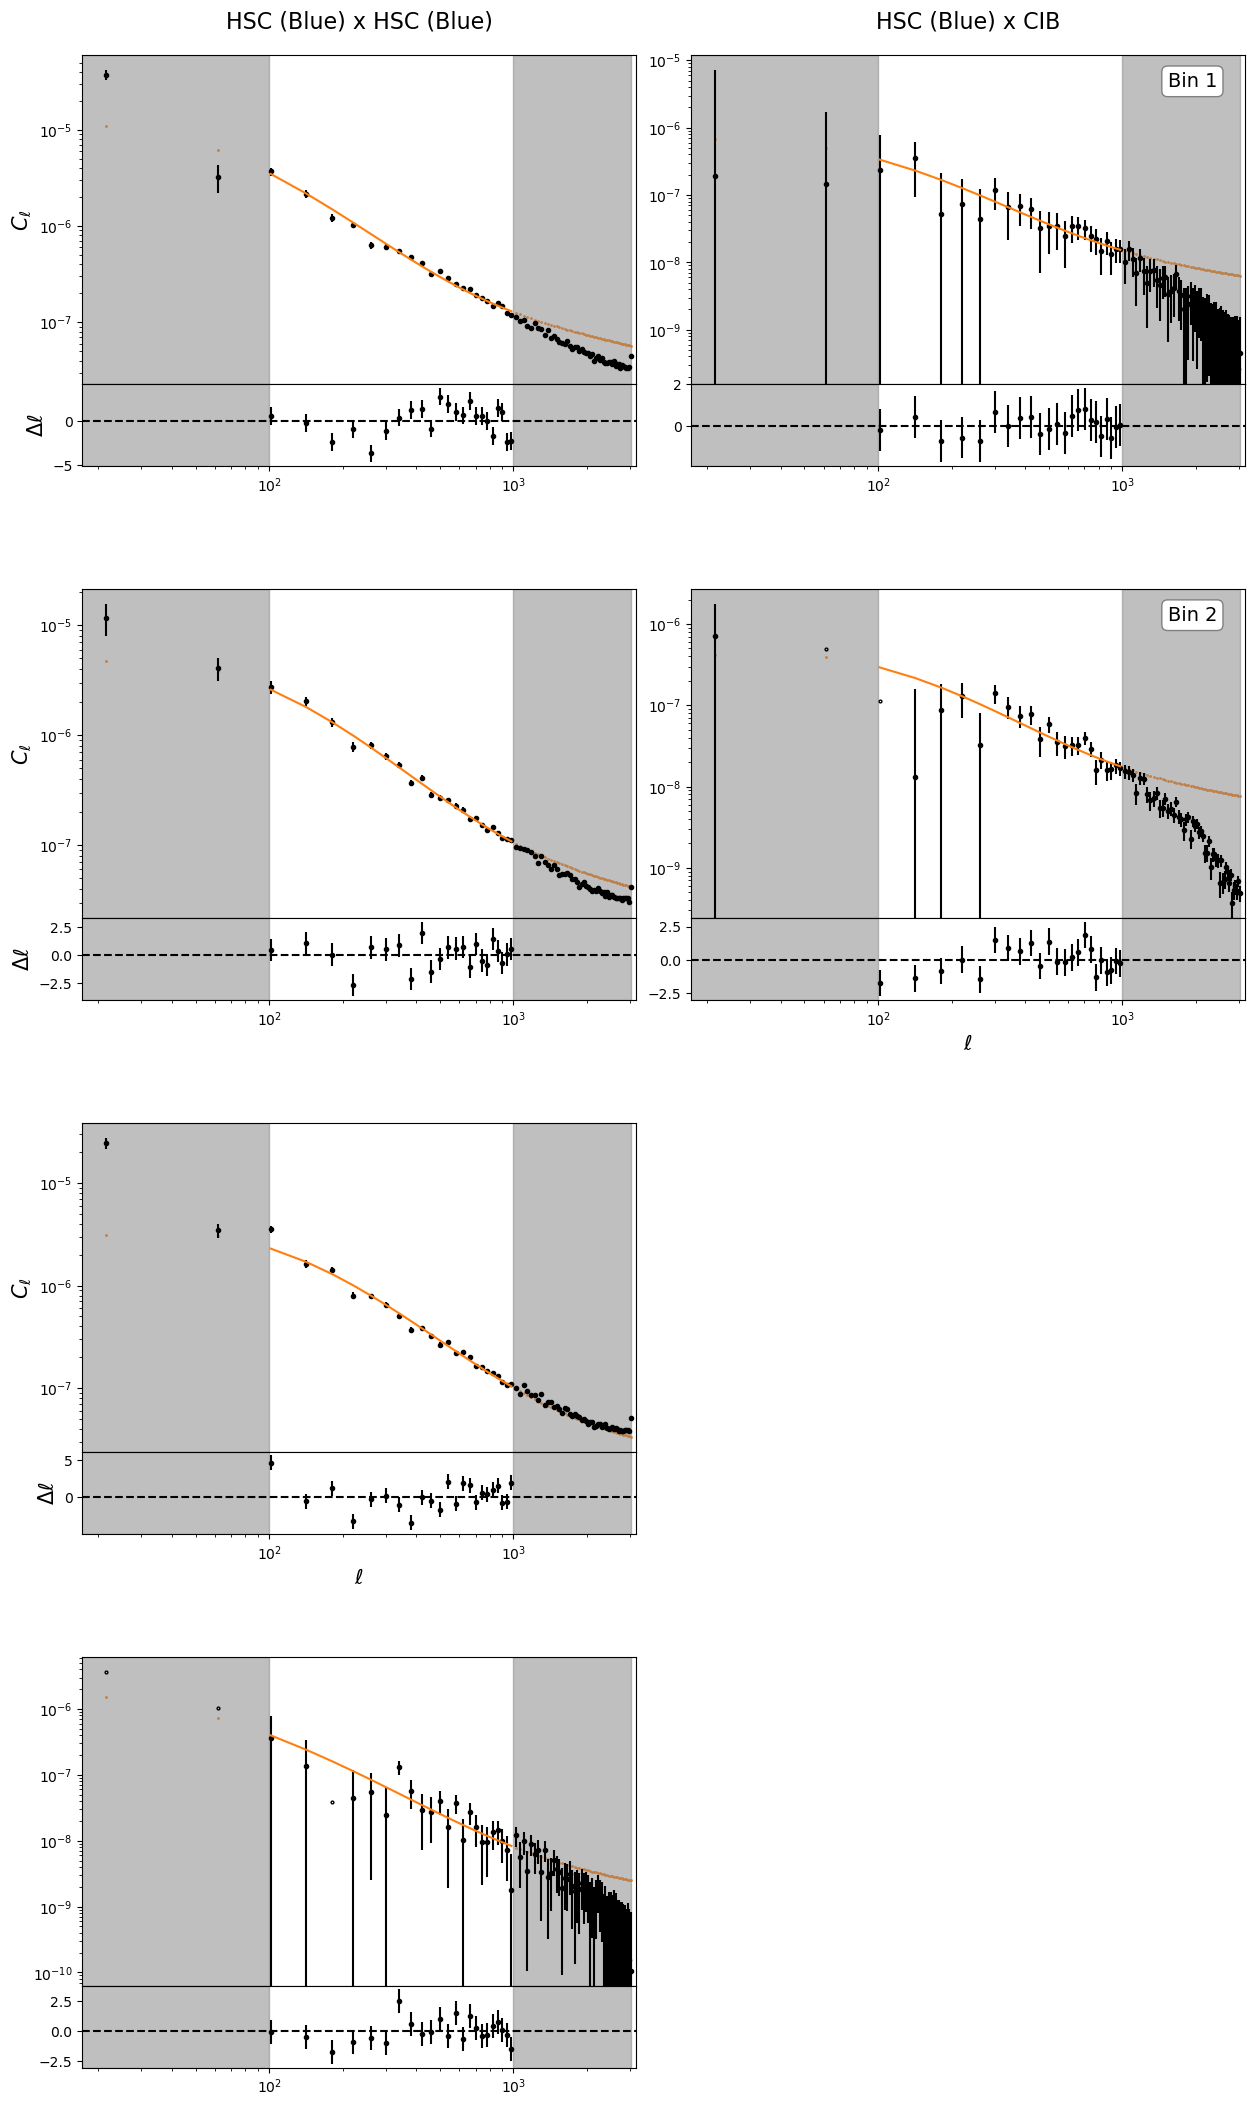

In [ ]:
plotter = ap.Plots(s)

plotter.create_grid_plot(
    subplot_titles=['HSC (Blue) x HSC (Blue)', 'HSC (Blue) x CIB'],
    subplot_tracer_combos=tracer_combos,
    measured_data=measured_data,
    measured_data_err=errors,
    modelled_data=modelled,
    cut_positions=[100, 1000],
    residuals=True,
    full_ells=True
)